In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim

In [2]:
def rosenbrock(tensor):
    # since pytorch uses tensor, we don't use built-in function here
    x, y = tensor
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

def execute_steps(func, initial_state, optimizer_class, optimizer_config, num_iter=500):
    x = torch.Tensor(initial_state).requires_grad_(True)
    optimizer = optimizer_class([x], **optimizer_config)
    steps = []
    steps = np.zeros((2, num_iter))
    steps[:, 0] = np.array(initial_state)
    last_f = torch.tensor([100., 100.])
    for i in range(0, num_iter):
        optimizer.zero_grad()
        f = func(x)
        f.backward(create_graph=True, retain_graph=True)
        torch.nn.utils.clip_grad_norm_(x, 1.0)
        optimizer.step()
        steps[:, i] = x.detach().numpy()
    return steps

def plot_rosenbrok(grad_iter, optimizer_name):
    x = np.linspace(-2, 2, 250)
    y = np.linspace(-1, 3, 250)
    minimum = (1.0, 1.0)

    X, Y = np.meshgrid(x, y)
    Z = rosenbrock([X, Y])

    iter_x, iter_y = grad_iter[0, :], grad_iter[1, :]

    fig = plt.figure(figsize=(8, 8))

    ax = fig.add_subplot(1, 1, 1)
    ax.contour(X, Y, Z, 90, cmap='jet')
    ax.plot(iter_x, iter_y, color='r', marker='x')

    ax.set_title('{} with {} iterations'.format(optimizer_name, len(iter_x)))
    plt.plot(*minimum, 'gD')
    plt.plot(iter_x[-1], iter_y[-1], 'rD')
    plt.show()

In [3]:
def printX(steps):
    iter_x, iter_y = steps[0, :], steps[1, :]
    i=0
    for x,y in zip(iter_x,iter_y):
        print("iteration %d: [%.4f %.4f]" %(i,x,y))
        i+=1

In [81]:
def rosen(a,b):
    return (1-a)**2 + 100*(b-a**2)**2

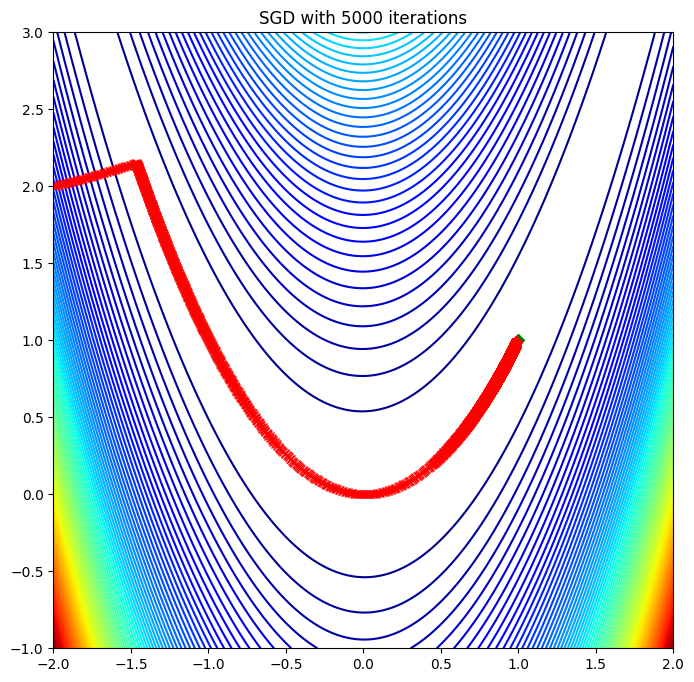

In [83]:
initial_state = np.array([-2,2])
# TODO: Try other optimizers!
optimizer_class = torch.optim.SGD
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        # TODO: Try some different hyperparameters! Note that these parameters should be wraped in a dict().
        {'lr':1e-2, 'weight_decay':1e-3}, #2e-3,0.9,1e-3  #iteration 4999: [0.9985 0.9970]
        num_iter=5000,
    )
plot_rosenbrok(steps, optimizer_class.__name__)

In [84]:
printX(steps)

iteration 0: [-1.9903 2.0024]
iteration 1: [-1.9806 2.0048]
iteration 2: [-1.9708 2.0072]
iteration 3: [-1.9611 2.0097]
iteration 4: [-1.9514 2.0121]
iteration 5: [-1.9417 2.0145]
iteration 6: [-1.9320 2.0170]
iteration 7: [-1.9223 2.0195]
iteration 8: [-1.9126 2.0220]
iteration 9: [-1.9029 2.0245]
iteration 10: [-1.8932 2.0270]
iteration 11: [-1.8835 2.0295]
iteration 12: [-1.8738 2.0320]
iteration 13: [-1.8641 2.0346]
iteration 14: [-1.8545 2.0371]
iteration 15: [-1.8448 2.0397]
iteration 16: [-1.8351 2.0423]
iteration 17: [-1.8254 2.0449]
iteration 18: [-1.8158 2.0475]
iteration 19: [-1.8061 2.0501]
iteration 20: [-1.7964 2.0527]
iteration 21: [-1.7868 2.0554]
iteration 22: [-1.7771 2.0580]
iteration 23: [-1.7675 2.0607]
iteration 24: [-1.7578 2.0634]
iteration 25: [-1.7482 2.0661]
iteration 26: [-1.7386 2.0688]
iteration 27: [-1.7289 2.0715]
iteration 28: [-1.7193 2.0743]
iteration 29: [-1.7097 2.0770]
iteration 30: [-1.7001 2.0798]
iteration 31: [-1.6904 2.0825]
iteration 32: [-1.

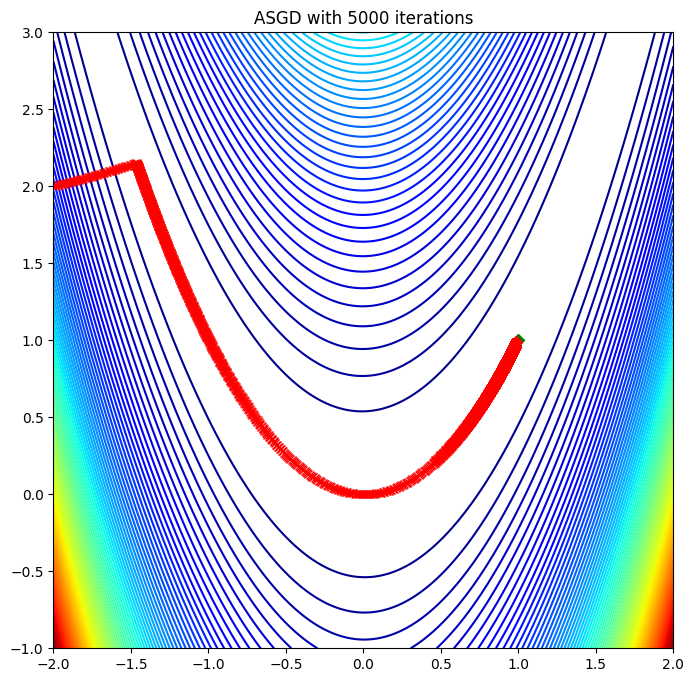

In [111]:
initial_state = np.array([-2,2])
# TODO: Try other optimizers!
optimizer_class = torch.optim.ASGD
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        # TODO: Try some different hyperparameters! Note that these parameters should be wraped in a dict().
        {'lr':1e-2, 'weight_decay':1e-3},  #40e-4,1e-4  #[0.9924 0.9820]
        num_iter=5000,
    )
plot_rosenbrok(steps, optimizer_class.__name__)

In [112]:
printX(steps)

iteration 0: [-1.9903 2.0024]
iteration 1: [-1.9806 2.0048]
iteration 2: [-1.9708 2.0072]
iteration 3: [-1.9611 2.0096]
iteration 4: [-1.9514 2.0121]
iteration 5: [-1.9417 2.0145]
iteration 6: [-1.9320 2.0170]
iteration 7: [-1.9223 2.0195]
iteration 8: [-1.9126 2.0220]
iteration 9: [-1.9029 2.0244]
iteration 10: [-1.8932 2.0270]
iteration 11: [-1.8835 2.0295]
iteration 12: [-1.8738 2.0320]
iteration 13: [-1.8641 2.0345]
iteration 14: [-1.8544 2.0371]
iteration 15: [-1.8448 2.0397]
iteration 16: [-1.8351 2.0423]
iteration 17: [-1.8254 2.0448]
iteration 18: [-1.8157 2.0474]
iteration 19: [-1.8061 2.0501]
iteration 20: [-1.7964 2.0527]
iteration 21: [-1.7868 2.0553]
iteration 22: [-1.7771 2.0580]
iteration 23: [-1.7674 2.0607]
iteration 24: [-1.7578 2.0633]
iteration 25: [-1.7482 2.0660]
iteration 26: [-1.7385 2.0687]
iteration 27: [-1.7289 2.0715]
iteration 28: [-1.7192 2.0742]
iteration 29: [-1.7096 2.0769]
iteration 30: [-1.7000 2.0797]
iteration 31: [-1.6904 2.0825]
iteration 32: [-1.

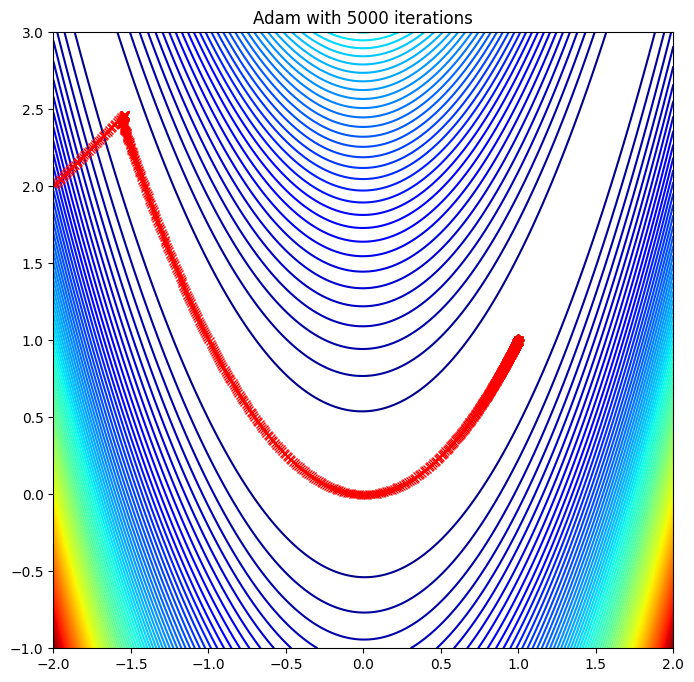

In [136]:
initial_state = np.array([-2,2])
# TODO: Try other optimizers!
optimizer_class = torch.optim.Adam
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        # TODO: Try some different hyperparameters! Note that these parameters should be wraped in a dict().
        {'lr':1e-2, 'weight_decay':0},#2e-3,1e-3  #[0.9985 0.9970]
        num_iter=5000,
    )
plot_rosenbrok(steps, optimizer_class.__name__)

In [137]:
printX(steps)

iteration 0: [-1.9900 2.0100]
iteration 1: [-1.9800 2.0200]
iteration 2: [-1.9700 2.0300]
iteration 3: [-1.9600 2.0400]
iteration 4: [-1.9500 2.0500]
iteration 5: [-1.9400 2.0600]
iteration 6: [-1.9300 2.0701]
iteration 7: [-1.9200 2.0801]
iteration 8: [-1.9100 2.0901]
iteration 9: [-1.9000 2.1001]
iteration 10: [-1.8900 2.1102]
iteration 11: [-1.8800 2.1203]
iteration 12: [-1.8700 2.1303]
iteration 13: [-1.8600 2.1404]
iteration 14: [-1.8500 2.1505]
iteration 15: [-1.8400 2.1606]
iteration 16: [-1.8300 2.1707]
iteration 17: [-1.8201 2.1808]
iteration 18: [-1.8101 2.1909]
iteration 19: [-1.8001 2.2011]
iteration 20: [-1.7901 2.2113]
iteration 21: [-1.7801 2.2214]
iteration 22: [-1.7701 2.2316]
iteration 23: [-1.7601 2.2419]
iteration 24: [-1.7501 2.2521]
iteration 25: [-1.7402 2.2623]
iteration 26: [-1.7302 2.2726]
iteration 27: [-1.7202 2.2829]
iteration 28: [-1.7102 2.2932]
iteration 29: [-1.7002 2.3035]
iteration 30: [-1.6903 2.3138]
iteration 31: [-1.6803 2.3242]
iteration 32: [-1.

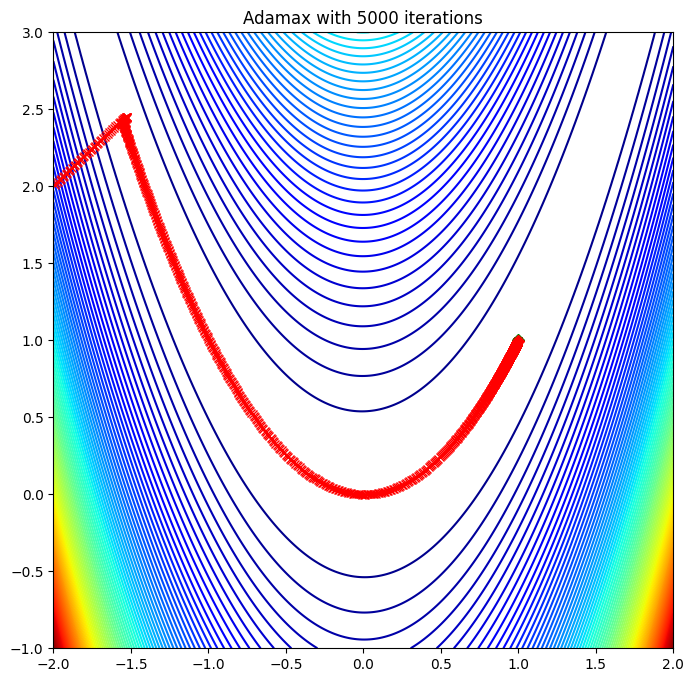

In [132]:
initial_state = np.array([-2,2])
# TODO: Try other optimizers!
optimizer_class = torch.optim.Adamax
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        # TODO: Try some different hyperparameters! Note that these parameters should be wraped in a dict().
        {'lr':1e-2, 'weight_decay':0}, #2e-3,1e-3 #[0.9985 0.9970]
        num_iter=5000,
    )
plot_rosenbrok(steps, optimizer_class.__name__)

In [133]:
printX(steps)

iteration 0: [-1.9900 2.0100]
iteration 1: [-1.9800 2.0200]
iteration 2: [-1.9700 2.0299]
iteration 3: [-1.9600 2.0399]
iteration 4: [-1.9500 2.0498]
iteration 5: [-1.9400 2.0597]
iteration 6: [-1.9300 2.0696]
iteration 7: [-1.9200 2.0794]
iteration 8: [-1.9100 2.0893]
iteration 9: [-1.8999 2.0991]
iteration 10: [-1.8899 2.1089]
iteration 11: [-1.8799 2.1187]
iteration 12: [-1.8699 2.1285]
iteration 13: [-1.8599 2.1383]
iteration 14: [-1.8499 2.1480]
iteration 15: [-1.8398 2.1578]
iteration 16: [-1.8298 2.1675]
iteration 17: [-1.8198 2.1773]
iteration 18: [-1.8098 2.1870]
iteration 19: [-1.7998 2.1967]
iteration 20: [-1.7897 2.2064]
iteration 21: [-1.7797 2.2161]
iteration 22: [-1.7697 2.2258]
iteration 23: [-1.7597 2.2354]
iteration 24: [-1.7496 2.2451]
iteration 25: [-1.7396 2.2548]
iteration 26: [-1.7296 2.2644]
iteration 27: [-1.7196 2.2741]
iteration 28: [-1.7095 2.2837]
iteration 29: [-1.6995 2.2934]
iteration 30: [-1.6895 2.3030]
iteration 31: [-1.6794 2.3126]
iteration 32: [-1.